## Mushroom Classification ##

**Mushroom Dataset**: https://archive.ics.uci.edu/dataset/73/mushroom

**Goal**: To determine whether a mushroom would be poisonous or edible based on physical characteristics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

## Step 1: Import and Adjust Dataset ##

In [2]:
#Manually adding headers to the data
headers = ["Poisonous", "Cap-shape", "Cap-surface", "Cap-color", "Bruises",
          "Odor", "Gill-attachment", "Gill-spacing", "Gill-size", "Gill-color",
          "Stalk-shape", "Stalk-root", "Stalk-surface-above-ring",
          "Stalk-surface-below-ring", "Stalk-color-above-ring",
          "Stalk-color-below-ring", "Veil-type", "Veil-color", "Ring-number",
          "Ring-type", "Spore-print-color", "Population", "Habitat"]

data = pd.read_csv('mushroom.data.csv', header = None, names = headers)

#Preview the data
data.head()

,Poisonous,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#Assess datatypes in the dataset - all strings!
print(data.dtypes)

#Check for any NaN values in the dataset and drop rows with them. 
data[data.isnull().any(axis=1)]
data.dropna()

#Preview data
data.head()

Poisonous                   object
Cap-shape                   object
Cap-surface                 object
Cap-color                   object
Bruises                     object
Odor                        object
Gill-attachment             object
Gill-spacing                object
Gill-size                   object
Gill-color                  object
Stalk-shape                 object
Stalk-root                  object
Stalk-surface-above-ring    object
Stalk-surface-below-ring    object
Stalk-color-above-ring      object
Stalk-color-below-ring      object
Veil-type                   object
Veil-color                  object
Ring-number                 object
Ring-type                   object
Spore-print-color           object
Population                  object
Habitat                     object
dtype: object


,Poisonous,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Use the label encoder function of SKlearn to do convert categorical data
#via ordinal encoding

lb_Make = LabelEncoder()
data["Poisonous"] = lb_Make.fit_transform(data["Poisonous"])
data["Cap-shape"] = lb_Make.fit_transform(data["Cap-shape"])
data["Cap-surface"] = lb_Make.fit_transform(data["Cap-surface"])
data["Cap-color"] = lb_Make.fit_transform(data["Cap-color"])
data["Bruises"] = lb_Make.fit_transform(data["Bruises"])
data["Odor"] = lb_Make.fit_transform(data["Odor"])
data["Gill-attachment"] = lb_Make.fit_transform(data["Gill-attachment"])
data["Gill-spacing"] = lb_Make.fit_transform(data["Gill-spacing"])
data["Gill-size"] = lb_Make.fit_transform(data["Gill-size"])
data["Gill-color"] = lb_Make.fit_transform(data["Gill-color"])
data["Stalk-shape"] = lb_Make.fit_transform(data["Stalk-shape"])
data["Stalk-root"] = lb_Make.fit_transform(data["Stalk-root"])
data["Stalk-surface-above-ring"] = lb_Make.fit_transform(data["Stalk-surface-above-ring"])
data["Stalk-surface-below-ring"] = lb_Make.fit_transform(data["Stalk-surface-below-ring"])
data["Stalk-color-above-ring"] = lb_Make.fit_transform(data["Stalk-color-above-ring"])
data["Stalk-color-below-ring"] = lb_Make.fit_transform(data["Stalk-color-below-ring"])
data["Veil-type"] = lb_Make.fit_transform(data["Veil-type"])
data["Veil-color"] = lb_Make.fit_transform(data["Veil-color"])
data["Ring-number"] = lb_Make.fit_transform(data["Ring-number"])
data["Ring-type"] = lb_Make.fit_transform(data["Ring-type"])
data["Spore-print-color"] = lb_Make.fit_transform(data["Spore-print-color"])
data["Population"] = lb_Make.fit_transform(data["Population"])
data["Habitat"] = lb_Make.fit_transform(data["Habitat"])
data.head()

,Poisonous,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
#Convert dataset to Numpy array
data = data.values

#Preview the data
print(data[0:5,:])

[[1 5 2 4 1 6 1 0 1 4 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 9 1 0 1 0 0 4 0 2 2 2 7 7 0 2 1 4 3 2 1]
 [0 0 2 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 2 3]
 [1 5 3 8 1 6 1 0 1 5 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 3 0 5 1 1 0 4 1 3 2 2 7 7 0 2 1 0 3 0 1]]


## Step 2: Defining Classifiers ##

In [6]:
global count 
count = 0
def draw_heatmap(acc, acc_desc, C_list, character):
    global count
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("Accuracy")
    ax.set(ylabel='$'  + character + '$')
    plt.title(acc_desc + ' w.r.t $' + character + '$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    count+=1

In [7]:
#Decision Tree (DT) Classifier
def decision_tree(X_train_val, Y_train_val, X_test, Y_test):
    D_list = np.array([1, 2, 3, 4, 5])
    parameters = {'max_depth':D_list}
    
    #Finding the optimal model
    classifier_grid = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), parameters, cv=5, return_train_score=True)
    
    #Fit classifier with training data
    classifier_grid.fit(X_train_val, Y_train_val)
    
    #Training + validation accuracy
    DT_train_acc = classifier_grid.cv_results_['mean_train_score']
    DT_val_acc = classifier_grid.cv_results_['mean_test_score']

    #Train + test model with best parameter
    D_best_param = classifier_grid.best_params_['max_depth']
    classifier_test = DecisionTreeClassifier(max_depth=D_best_param, criterion="entropy")
    classifier_test.fit(X_train_val, Y_train_val)
    
    for i,j in enumerate(D_list):
        if j == D_best_param:
            DT_best_train_acc = DT_train_acc[i]
    
    #Test accuracy
    DT_test_acc = classifier_test.score(X_test,Y_test)
            
    #Training + validation accuracy heatmaps
    draw_heatmap(DT_train_acc.reshape(5,1), 'DT train accuracy', D_list, 'D')
    draw_heatmap(DT_val_acc.reshape(5,1), 'DT val accuracy', D_list, 'D')
    
    return DT_test_acc, DT_best_train_acc, D_best_param

In [8]:
#KNN Classifier
def knn_classifier(X_train_val, Y_train_val, X_test, Y_test):
    K_list = np.array([1, 2, 3, 4, 5, 6])
    parameters = {'n_neighbors':K_list}
    
    #Finding the optimal model
    classifier_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)
    
    #Fit classifier with training data
    classifier_grid.fit(X_train_val, Y_train_val)
    
    #Training + validation accuracy
    KNN_train_acc = classifier_grid.cv_results_['mean_train_score']
    KNN_val_acc = classifier_grid.cv_results_['mean_test_score']

    #Train + test model with best parameter
    K_best_param = classifier_grid.best_params_['n_neighbors']
    classifier_test2 = KNeighborsClassifier(n_neighbors=K_best_param)
    classifier_test2.fit(X_train_val,Y_train_val)
    
    for i,j in enumerate(K_list):
        if j == K_best_param:
            KNN_best_train_acc = KNN_train_acc[i]
    
    #Test accuracy
    KNN_test_acc = classifier_test2.score(X_test,Y_test)
    
    #Training + validation accuracy heatmaps
    draw_heatmap(KNN_train_acc.reshape(6,1), 'KNN train accuracy', K_list, 'K')
    draw_heatmap(KNN_val_acc.reshape(6,1), 'KNN val accuracy', K_list, 'K')
    
    return KNN_test_acc, KNN_best_train_acc, K_best_param

In [9]:
#Random Forest Classifier
def random_forest(X_train_val, Y_train_val, X_test, Y_test):
    D_list = np.array([1, 2, 3, 4, 5])
    parameters = {'max_depth':D_list}
    
    #Finding the optimal model
    classifier_grid = GridSearchCV(RandomForestClassifier(criterion="entropy"), parameters, cv=5, return_train_score=True)
    
    #Fit classifier with training data
    classifier_grid.fit(X_train_val, Y_train_val)
    
    #Training + validation accuracy
    RF_train_acc = classifier_grid.cv_results_['mean_train_score']
    RF_val_acc = classifier_grid.cv_results_['mean_test_score']

    #Train + test model with best parameter
    D_best_param = classifier_grid.best_params_['max_depth']
    classifier_test1 = RandomForestClassifier(max_depth=D_best_param, criterion="entropy")
    classifier_test1.fit(X_train_val, Y_train_val)
    
    for i,j in enumerate(D_list):
        if j == D_best_param:
            RF_best_train_acc = RF_train_acc[i]
    
    #Test accuracy
    RF_test_acc = classifier_test1.score(X_test,Y_test)
    
    #Training + validation accuracy heatmaps
    draw_heatmap(RF_train_acc.reshape(5,1), 'RF train accuracy', D_list, 'K')
    draw_heatmap(RF_val_acc.reshape(5,1), 'RF val accuracy', D_list, 'K')
    
    return RF_test_acc, RF_best_train_acc, D_best_param

In [10]:
#SVM Linear Classification
def svm_linear(X_train_val, Y_train_val, X_test, Y_test):
    classifier = svm.SVC(kernel = 'linear')
    C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]
    parameters = {'C': C_list}
    
    #Finding the optimal model
    clf = GridSearchCV(classifier, parameters, return_train_score=True, cv=5)
    
    #Fit classifier with training data
    clf.fit(X_train_val, Y_train_val)
    
    #Training + validation accuracy
    SVM_train_acc = clf.cv_results_['mean_train_score']
    SVM_val_acc = clf.cv_results_['mean_test_score']

    #Find the optimal C parameter 
    C_best_param = clf.best_params_['C']
    optimal_classifier = svm.SVC(kernel = 'linear', C=C_best_param)
    SVM_best_train_acc = None
    
    for i,j in enumerate(C_list):
        if j == C_best_param:
            SVM_best_train_acc = SVM_train_acc[i]
            break
            
    #Redefining the optimal classifier
    optimal_classifier.fit(X_train_val, Y_train_val)
    
    #Test accuracy
    SVM_test_acc = optimal_classifier.score(X_test, Y_test)

    #Training + validation accuracy heatmaps
    draw_heatmap(SVM_train_acc.reshape(-1,1), 'SVM Linear train accuracy', C_list, 'C')
    draw_heatmap(SVM_val_acc.reshape(-1,1), 'SVM Linear val accuracy', C_list, 'C')

    return SVM_test_acc, SVM_best_train_acc, C_best_param

## Step 3: Perform Classification ##

Partition:  0.2
(1624, 22) (6500, 22) (1624,) (6500,)


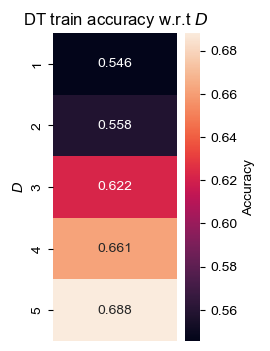

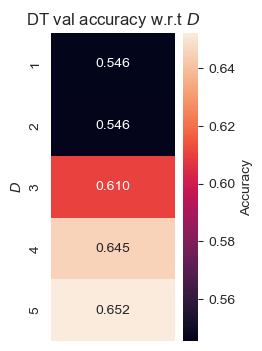

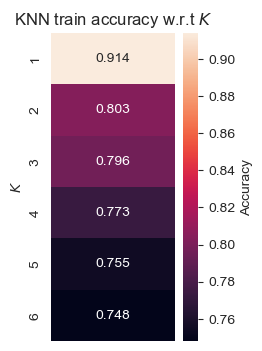

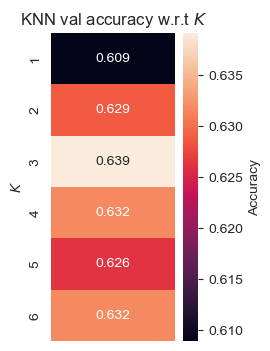

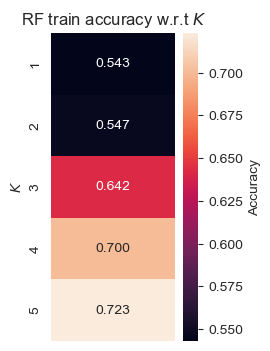

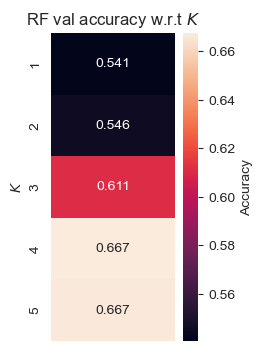

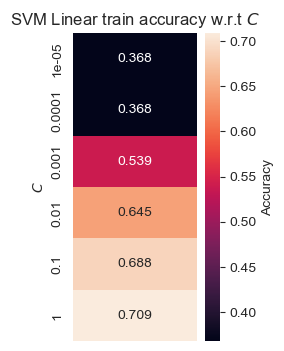

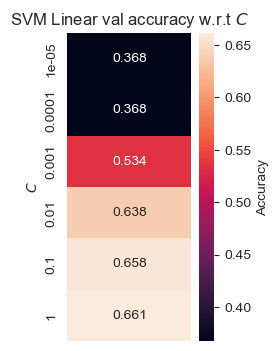

Trial # =  1
(1624, 22) (6500, 22) (1624,) (6500,)


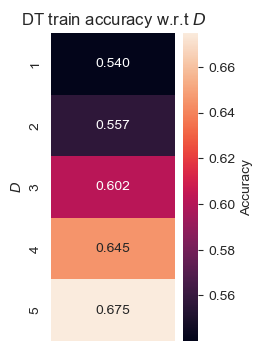

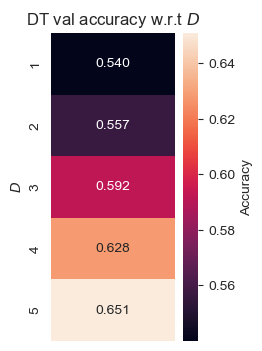

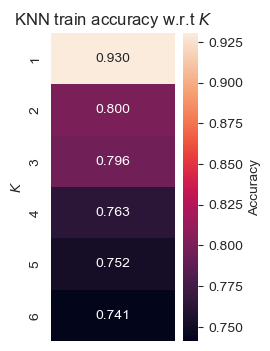

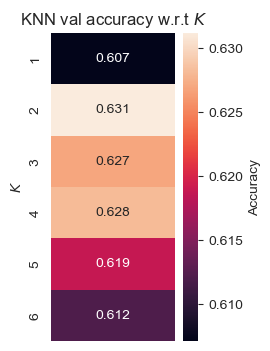

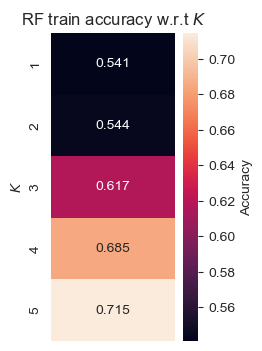

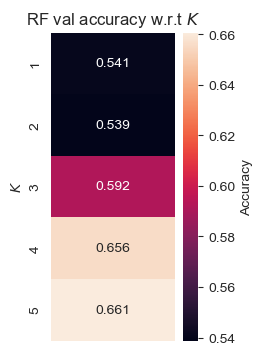

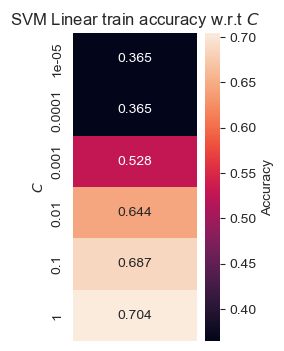

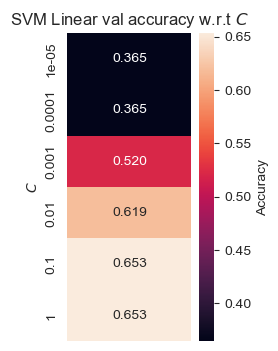

Trial # =  2
(1624, 22) (6500, 22) (1624,) (6500,)


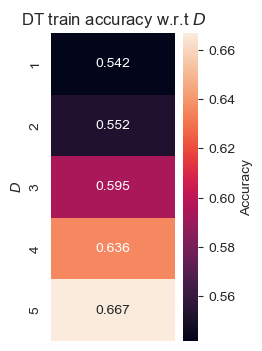

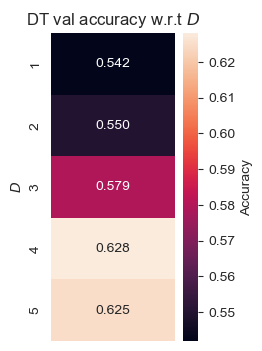

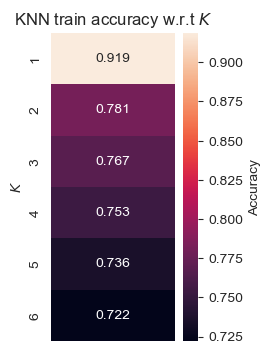

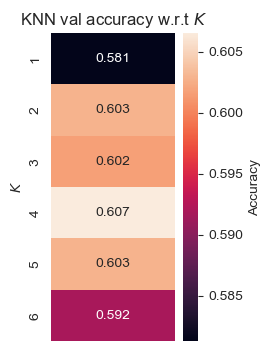

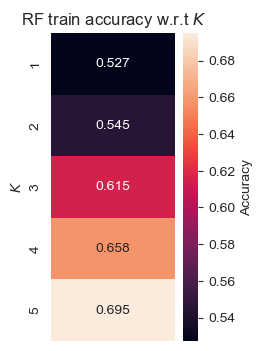

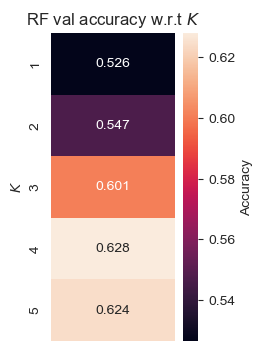

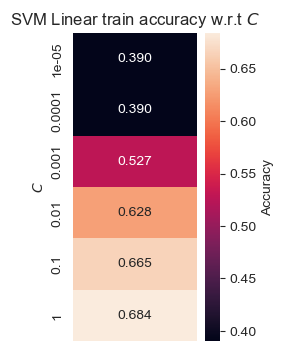

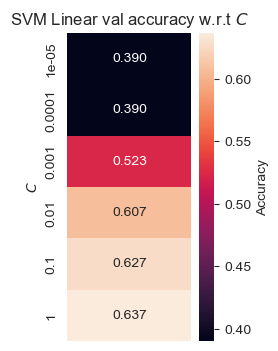

Trial # =  3
Avg Test Accuracy for Decision Tree (DT) =  0.6500512820512819
Avg Test Accuracy for KNN =  0.6358974358974359
Avg Test Accuracy for Random Forest =  0.6557435897435897
Avg Test Accuracy for SVM Linear =  0.6623076923076924
Partition:  0.5
(4062, 22) (4062, 22) (4062,) (4062,)


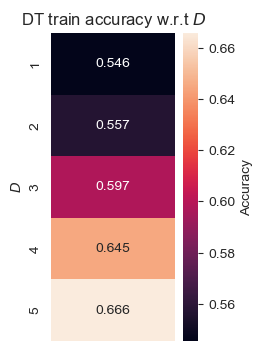

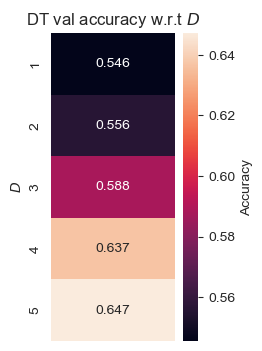

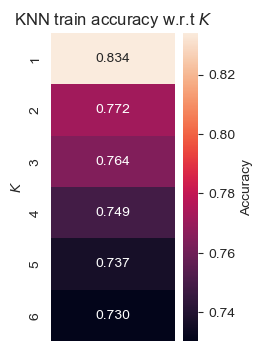

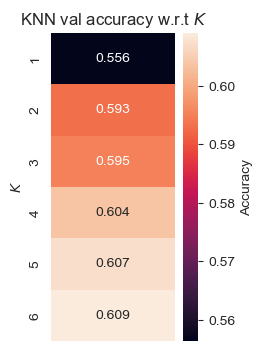

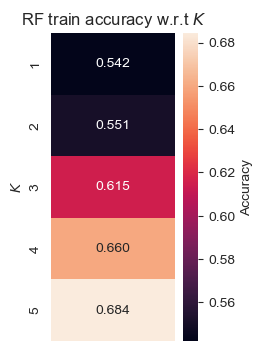

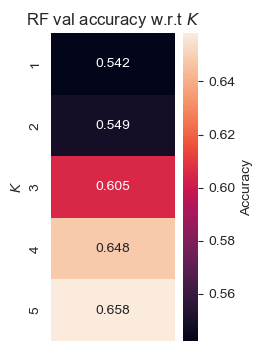

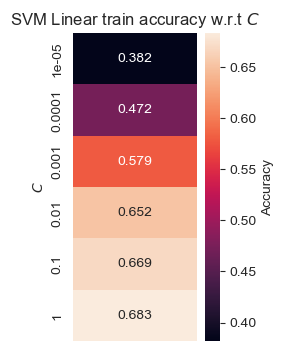

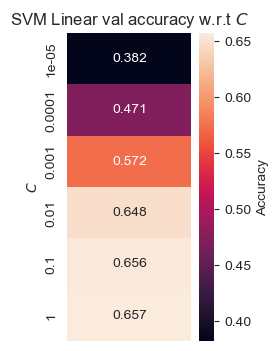

Trial # =  1
(4062, 22) (4062, 22) (4062,) (4062,)


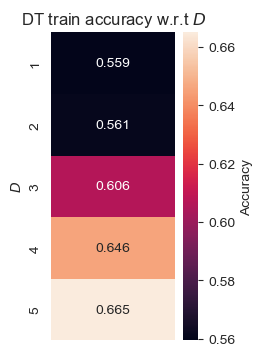

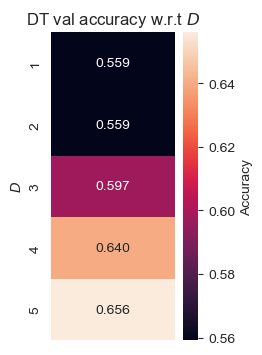

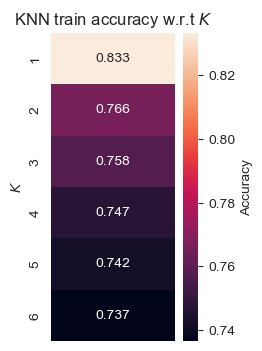

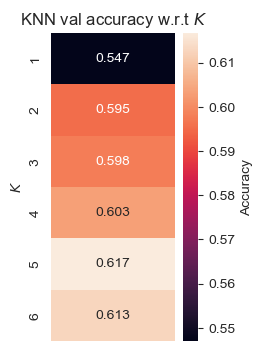

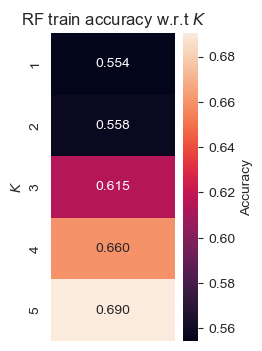

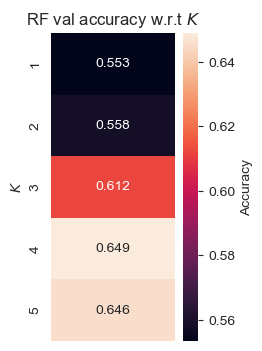

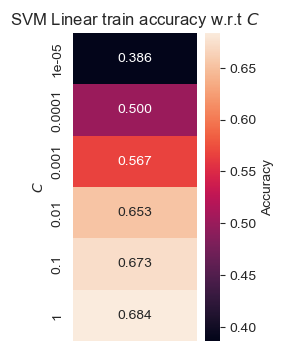

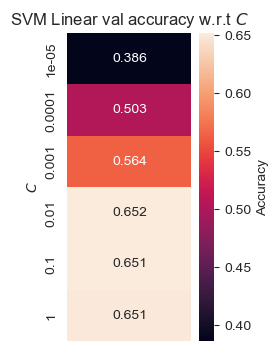

Trial # =  2
(4062, 22) (4062, 22) (4062,) (4062,)


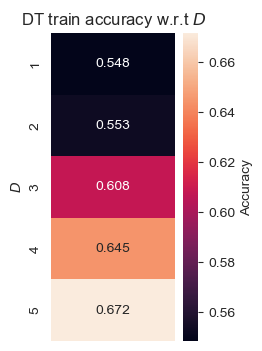

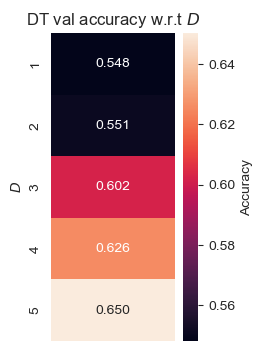

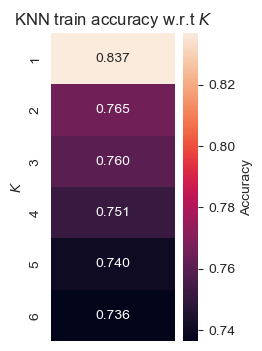

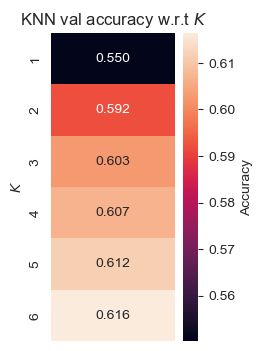

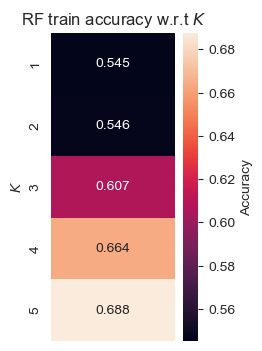

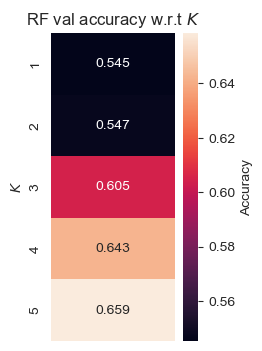

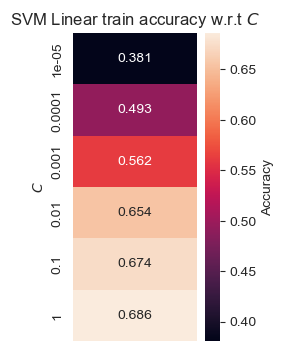

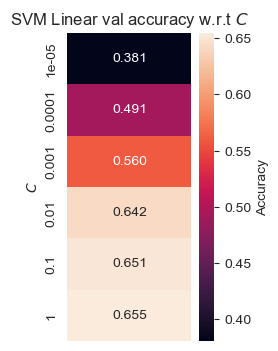

Trial # =  3
Avg Test Accuracy for Decision Tree (DT) =  0.6515673723945512
Avg Test Accuracy for KNN =  0.6107008042015428
Avg Test Accuracy for Random Forest =  0.657311669128508
Avg Test Accuracy for SVM Linear =  0.6586246512391268
Partition:  0.8
(6499, 22) (1625, 22) (6499,) (1625,)


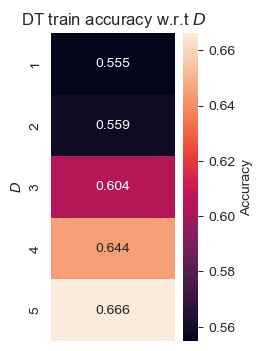

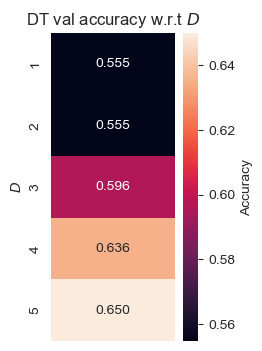

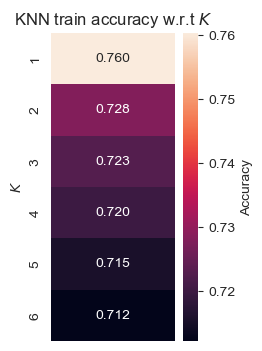

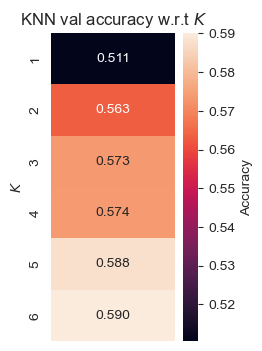

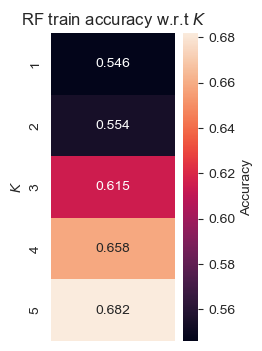

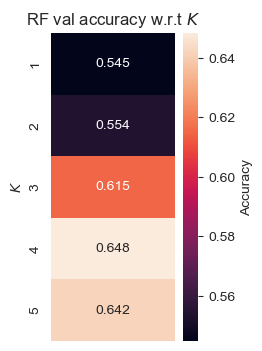

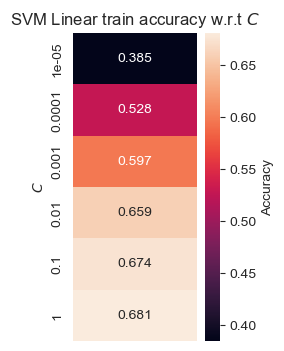

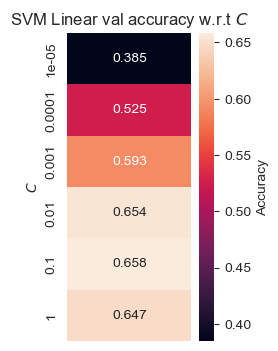

Trial # =  1
(6499, 22) (1625, 22) (6499,) (1625,)


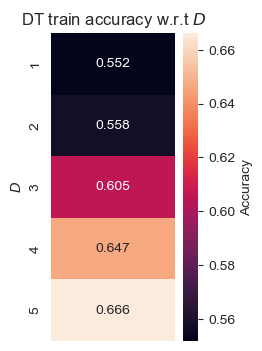

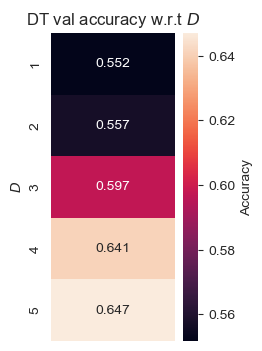

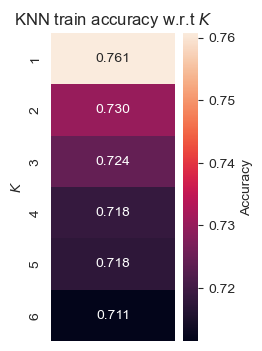

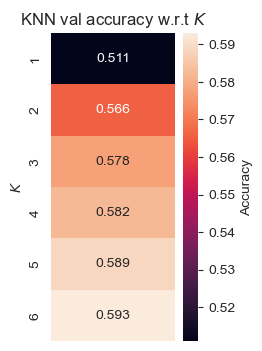

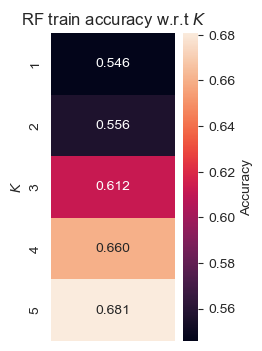

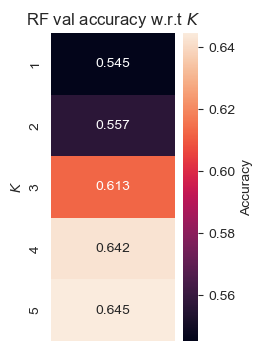

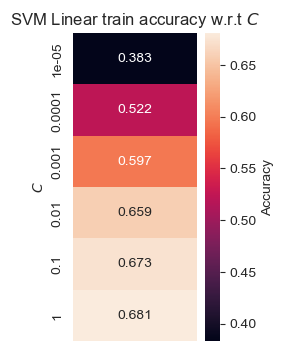

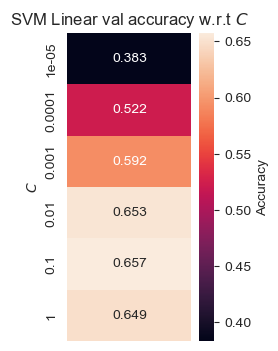

Trial # =  2
(6499, 22) (1625, 22) (6499,) (1625,)


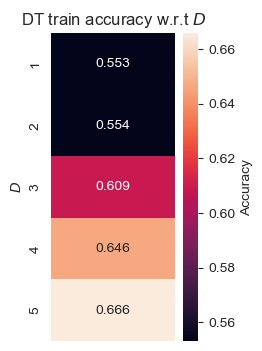

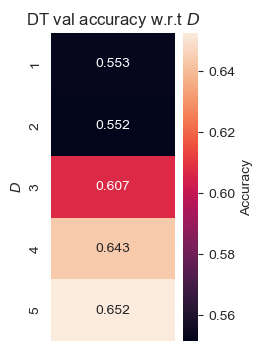

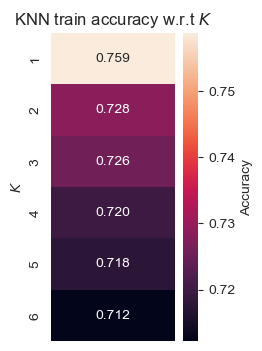

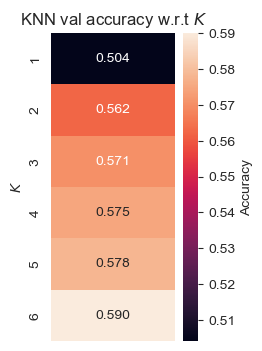

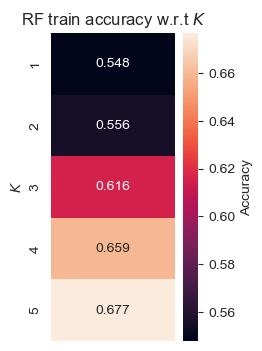

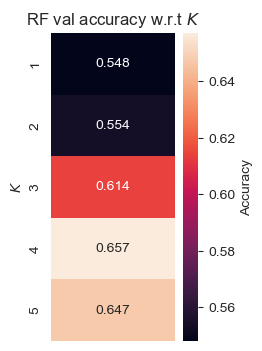

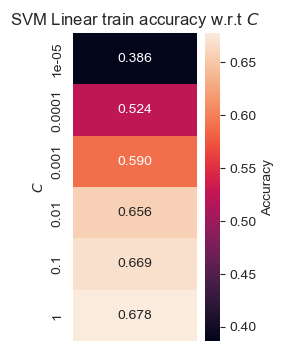

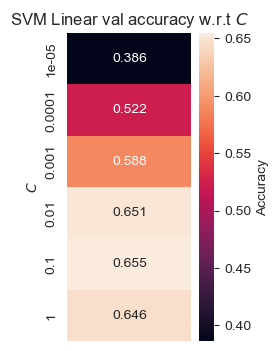

Trial # =  3
Avg Test Accuracy for Decision Tree (DT) =  0.6412307692307692
Avg Test Accuracy for KNN =  0.5815384615384614
Avg Test Accuracy for Random Forest =  0.6588717948717949
Avg Test Accuracy for SVM Linear =  0.662974358974359


In [11]:
#List partitions: 20/80, 50/50, 80/20
partition_nums = [0.2, 0.5, 0.8]

#Prepare result tables: test accuracy, best training accuracy, best parameter
test_acc_table = np.zeros((3,4))
best_train_table = np.zeros((3,4))
best_param_table = np.zeros((3,4))

#Perform classification over number of trials

for i, partition in enumerate(partition_nums):
    print("Partition: ", partition)
    
    #Prepare arrays to hold the test accuracies from each classifier
    DT_test_acc = []
    KNN_test_acc = []
    RF_test_acc = []
    SVM_test_acc = []
    
    #3 trials per partition
    num_trials = 3
    
    #Begin conducting trials and performing classification
    for trial in range(num_trials):
        #Shuffle the data to ensure randomization
        np.random.shuffle(data)
        
        #Find the partition point
        breakNum = int(partition * len(data))
        
        #Make the training and testing sets
        X_train_val = data[:breakNum,:-1]
        Y_train_val = data[:breakNum,-1]
        X_test = data[breakNum:,:-1]
        Y_test = data[breakNum:,-1]
        
        print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)
        
        #Now we call the classifier functions defined in Step 2
        #After each function call, append the test accuracy to the appropriate array
        
        #Decision Tree Classifier
        test_acc, DT_best_train, DT_best_param = decision_tree(X_train_val, Y_train_val, X_test, Y_test)
        DT_test_acc.append(test_acc)
        
        #KNN Classifier
        test_acc, KNN_best_train, KNN_best_param = knn_classifier(X_train_val, Y_train_val, X_test, Y_test)
        KNN_test_acc.append(test_acc)
        
        #Random Forest Classifier
        test_acc, RF_best_train, RF_best_param = random_forest(X_train_val, Y_train_val, X_test, Y_test)
        RF_test_acc.append(test_acc)
        
        #SVM linear Classifier
        test_acc, SVM_best_train, SVM_best_param = svm_linear(X_train_val, Y_train_val, X_test, Y_test)
        SVM_test_acc.append(test_acc)
        
        print("Trial # = ", trial + 1)

    #Calculate the average test accuracies across the trials for each classifier
    DT_avg_test_acc = sum(DT_test_acc)/num_trials
    KNN_avg_test_acc = sum(KNN_test_acc)/num_trials
    RF_avg_test_acc = sum(RF_test_acc)/num_trials
    SVM_avg_test_acc = sum(SVM_test_acc)/num_trials
    
    #Fill in test_acc table with average test accuracy for each classifier
    test_acc_table[i,0] = DT_avg_test_acc
    test_acc_table[i,1] = KNN_avg_test_acc
    test_acc_table[i,2] = RF_avg_test_acc
    test_acc_table[i,3] = SVM_avg_test_acc
    
    #Fill in best_train table with best training accuracy for each classifier
    best_train_table[i,0] = DT_best_train
    best_train_table[i,1] = KNN_best_train
    best_train_table[i,2] = RF_best_train
    best_train_table[i,3] = SVM_best_train
    
    #Fill in best_param table with best hyperparameter for each classifier
    best_param_table[i,0] = DT_best_param
    best_param_table[i,1] = KNN_best_param
    best_param_table[i,2] = RF_best_param
    best_param_table[i,3] = SVM_best_param
    
    #Print out average test accuracies for the trials for each classifier
    print("Avg Test Accuracy for Decision Tree (DT) = ", DT_avg_test_acc)
    print("Avg Test Accuracy for KNN = ", KNN_avg_test_acc)
    print("Avg Test Accuracy for Random Forest = ", RF_avg_test_acc)
    print("Avg Test Accuracy for SVM Linear = ", SVM_avg_test_acc)

In [12]:
#Print out tables
print("Y-axis: partitions = 20/80, 50/50, 80/20")
print("X-axis: classifiers = Decision Tree, KNN, Random Forest, SVM Linear")
print("-----------------------------------------------------------------------")
print("Test Accuracy Table")
print(test_acc_table)
print("-----------------------------------------------------------------------")
print("Best Training Accuracy Table")
print(best_train_table)
print("-----------------------------------------------------------------------")
print("Best Parameter Table")
print(best_param_table)

Y-axis: partitions = 20/80, 50/50, 80/20
X-axis: classifiers = Decision Tree, KNN, Random Forest, SVM Linear
-----------------------------------------------------------------------
Test Accuracy Table
[[0.65005128 0.63589744 0.65574359 0.66230769]
 [0.65156737 0.6107008  0.65731167 0.65862465]
 [0.64123077 0.58153846 0.65887179 0.66297436]]
-----------------------------------------------------------------------
Best Training Accuracy Table
[[0.63608409 0.75292485 0.65778895 0.68395997]
 [0.67171339 0.7363987  0.68759238 0.685869  ]
 [0.66579465 0.7122249  0.6593321  0.66917986]]
-----------------------------------------------------------------------
Best Parameter Table
[[4.  4.  4.  1. ]
 [5.  6.  5.  1. ]
 [5.  6.  4.  0.1]]
